In [9]:
import numpy as np
import pandas as pd

from scipy.stats import norm

In [10]:
!ls ../../data/LLCP2018.XPT

../../data/LLCP2018.XPT


In [11]:
filename = '../../data/LLCP2018.XPT'
df = pd.read_sas(filename)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5022,_RFPAP34,_RFPSA22,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,b'01052018',b'01',b'05',b'2018',1100.0,b'2018000001',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000002',2.018000e+09,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,1.0,b'01082018',b'01',b'08',b'2018',1100.0,b'2018000003',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,b'01032018',b'01',b'03',b'2018',1100.0,b'2018000004',2.018000e+09,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000005',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [12]:
df['SEX1'].value_counts()

2.0    238911
1.0    197412
9.0       682
7.0       431
Name: SEX1, dtype: int64

In [13]:
male = df['SEX1'] == 1
male.sum()

197412

In [14]:
female = df['SEX1'] == 2
female.sum()

238911

In [15]:
df['HTM4'].describe()

count    420974.000000
mean        169.895887
std          10.721788
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         241.000000
Name: HTM4, dtype: float64

In [37]:
height_male = df.loc[male, 'HTM4']
height_male += np.random.normal(0, 2, male.sum())

height_male.mean(), height_male.std()

(178.015133313527, 8.272961809579046)

In [43]:
height_male.std() / height_male.mean()

0.04647336243603734

In [41]:
height_female = df.loc[female, 'HTM4']
height_female += np.random.normal(0, 2, female.sum())

height_female.mean(), height_female.std()

(163.11558651312797, 7.753027176098179)

In [44]:
height_female.std() / height_female.mean()

0.047530878819322366

In [39]:
def estimate_std(series, num_sigmas):
    ps = norm.cdf([-num_sigmas/2, num_sigmas/2])
    ipr = series.quantile(ps)
    std = np.diff(ipr) / num_sigmas
    return std

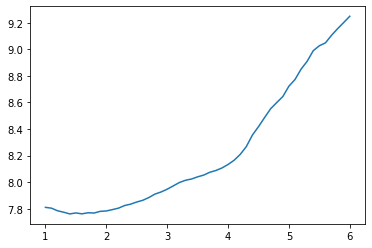

In [45]:
index = np.linspace(1, 6, 51)
std_series_male = pd.Series(1.0, index=index)

for num_sigmas in index:
    std_series_male[num_sigmas] = estimate_std(height_male, num_sigmas)
    
std_series_male.plot()

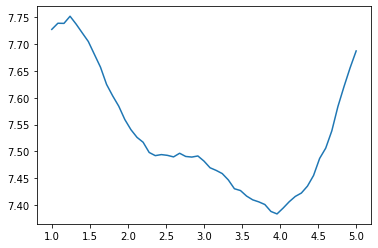

In [42]:
index = np.linspace(1, 5, 51)
std_series_female = pd.Series(1.0, index=index)

for num_sigmas in index:
    std_series_female[num_sigmas] = estimate_std(height_female, num_sigmas)
    
std_series_female.plot()

In [20]:
ipr_female = height_female.quantile(ps)
ipr_female

0.066807    152.117512
0.933193    174.271321
Name: HTM4, dtype: float64

In [21]:
np.diff(ipr_male) / 3

array([7.81866273])

In [22]:
np.diff(ipr_female) / 3

array([7.38460301])

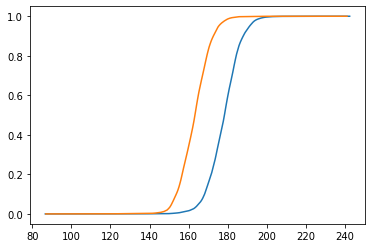

In [23]:
from empiricaldist import Cdf

cdf_male = Cdf.from_seq(height_male)
cdf_male.plot()

cdf_female = Cdf.from_seq(height_female)
cdf_female.plot()